In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!pip install transformers
!pip install datasets 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 81.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 KB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [3]:
from datasets import load_dataset,DatasetDict
from transformers import AutoTokenizer,TFAutoModelForSequenceClassification
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
DATA_PATH = "/content/gdrive/MyDrive/WAR misinformation/Final Dataset/Final Data/final_data_acl.csv" 

In [5]:
pandas_df = pd.read_csv(DATA_PATH)
pandas_df.head()

,TweetID,TweetText,Labels,Targets
0,1498812104148721668,"Are you a conservative who praised Putin, but ...",1,1.0
1,1498812116836360194,🇺🇦Ukrainian WEF Nazis bombing their own people...,1,3.0
2,1498812179440717825,"""Putin pays Trump."" \nKevin McCarthy \nJune 15...",1,1.0
3,1498812208922259458,🇺🇦 Go Fuck Yourself Russia!! 🇺🇦 https://t.co/b...,1,3.0
4,1498812217747292163,Russia better get ready... The Media has decid...,1,1.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


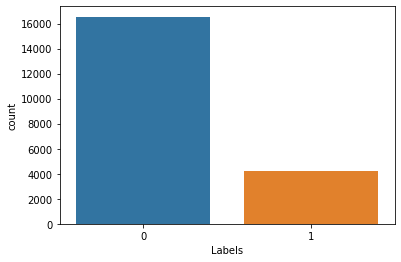

In [6]:
import seaborn as sns
sns.countplot('Labels', data=pandas_df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


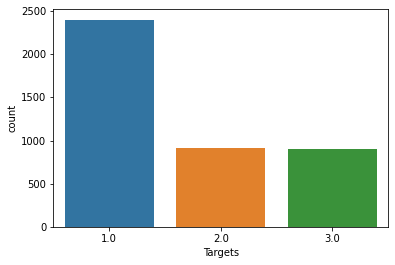

In [7]:
sns.countplot('Targets', data=pandas_df)

In [8]:
import re
Tweet = []
for tweettext in pandas_df["TweetText"]:
  text = re.sub(r"http\S+", "", tweettext)
  text = re.sub(r"@\S+","",text)
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'',text)
  text = re.sub('[^A-Za-z0-9]+', ' ', text)
  #print(text)
  Tweet.append(text)

In [9]:
pandas_df["tweet_cleaned"] = pd.Series(Tweet)
pandas_df.head()

,TweetID,TweetText,Labels,Targets,tweet_cleaned
0,1498812104148721668,"Are you a conservative who praised Putin, but ...",1,1.0,Are you a conservative who praised Putin but n...
1,1498812116836360194,🇺🇦Ukrainian WEF Nazis bombing their own people...,1,3.0,Ukrainian WEF Nazis bombing their own people
2,1498812179440717825,"""Putin pays Trump."" \nKevin McCarthy \nJune 15...",1,1.0,Putin pays Trump Kevin McCarthy June 15th 2016
3,1498812208922259458,🇺🇦 Go Fuck Yourself Russia!! 🇺🇦 https://t.co/b...,1,3.0,Go Fuck Yourself Russia
4,1498812217747292163,Russia better get ready... The Media has decid...,1,1.0,Russia better get ready The Media has decided


In [10]:
words_len = []
for i in range(len(pandas_df['tweet_cleaned'])):
  s = pandas_df['tweet_cleaned'][i].split() 
  words_len.append(len(s))

In [11]:
largest_sen = max(wordlen for wordlen in words_len)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 32 words


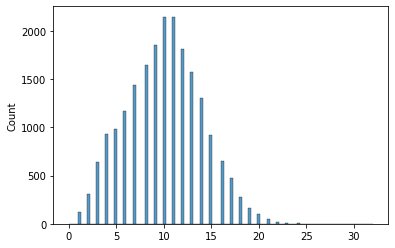

In [12]:
sns.histplot(data= [w for w in words_len],bins=100)

In [13]:
largest_sen = max(len(tweettext) for tweettext in Tweet)
print('biggest sentence has {} characters'.format(largest_sen))

biggest sentence has 172 characters


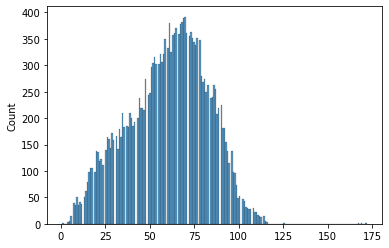

In [14]:
sns.histplot([len(s) for s in Tweet], bins = 200)

In [15]:
from datasets import Dataset

ds = Dataset.from_pandas(pandas_df)
ds

Dataset({
    features: ['TweetID', 'TweetText', 'Labels', 'Targets', 'tweet_cleaned'],
    num_rows: 20765
})

In [16]:
dataset = load_dataset('csv', data_files=DATA_PATH, split='train')

dataset

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-8d803f591398da5a/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317. Subsequent calls will reuse this data.


Dataset({
    features: ['TweetID', 'TweetText', 'Labels', 'Targets'],
    num_rows: 20765
})

In [17]:
train_test_valid = ds.train_test_split(test_size =0.3)

test_valid = train_test_valid['test'].train_test_split(test_size=0.5)

train_test_valid_dataset = DatasetDict({
    'train': train_test_valid['train'],
    'test': test_valid['test'],
    'valid': test_valid['train']
    })


dataset = train_test_valid_dataset.remove_columns(['TweetID', 'Targets',])
dataset

DatasetDict({
    train: Dataset({
        features: ['TweetText', 'Labels', 'tweet_cleaned'],
        num_rows: 14535
    })
    test: Dataset({
        features: ['TweetText', 'Labels', 'tweet_cleaned'],
        num_rows: 3115
    })
    valid: Dataset({
        features: ['TweetText', 'Labels', 'tweet_cleaned'],
        num_rows: 3115
    })
})

In [29]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [30]:
print(f"Vocab size is : {tokenizer.vocab_size}")

print(f"Model max length is : {tokenizer.model_max_length}")

print(f"Model input names are: {tokenizer.model_input_names}")

Vocab size is : 30522
Model max length is : 512
Model input names are: ['input_ids', 'token_type_ids', 'attention_mask']


In [31]:
def tokenize_function(train_dataset):
    return tokenizer(train_dataset['tweet_cleaned'], padding='max_length', truncation=True) 


tokenized_dataset = dataset.map(tokenize_function, batched=True)

tokenized_dataset

train_dataset = tokenized_dataset['train']
eval_dataset = tokenized_dataset['valid']
test_dataset = tokenized_dataset['test']

  0%|          | 0/15 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

In [32]:
train_dataset

Dataset({
    features: ['TweetText', 'Labels', 'tweet_cleaned', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 14535
})

In [33]:
train_set = train_dataset.remove_columns(['TweetText', "tweet_cleaned"]).with_format('tensorflow')

tf_eval_dataset = eval_dataset.remove_columns(['TweetText', "tweet_cleaned"]).with_format('tensorflow')

tf_test_dataset = test_dataset.remove_columns(['TweetText', "tweet_cleaned"]).with_format('tensorflow')

In [34]:
train_features = { x: train_set[x] for x in tokenizer.model_input_names  }

train_set_for_final_model = tf.data.Dataset.from_tensor_slices((train_features, train_set['Labels'] ))

train_set_for_final_model = train_set_for_final_model.shuffle(len(train_set)).batch(16)


eval_features = {x: tf_eval_dataset[x] for x in tokenizer.model_input_names}
val_set_for_final_model = tf.data.Dataset.from_tensor_slices((eval_features, tf_eval_dataset["Labels"]))
val_set_for_final_model = val_set_for_final_model.batch(16)

test_features = {x: tf_test_dataset[x] for x in tokenizer.model_input_names}
test_set_for_final_model = tf.data.Dataset.from_tensor_slices((test_features, tf_test_dataset["Labels"]))
test_set_for_final_model =test_set_for_final_model.batch(16)

In [35]:
pandas_df["tweet_cleaned"]

0        Are you a conservative who praised Putin but n...
1            Ukrainian WEF Nazis bombing their own people 
2          Putin pays Trump Kevin McCarthy June 15th 2016 
3                                 Go Fuck Yourself Russia 
4           Russia better get ready The Media has decided 
                               ...                        
20760    100000 turned out in Berlin today to Protest P...
20761                  100 cut of Ukraine for the big guy 
20762    1 Ukrainian tank and 1 APC abandoned in Bugas ...
20763    1 I don t say GM today frens I m Ukrainian and...
20764    001 Russia Getting the band back together Brin...
Name: tweet_cleaned, Length: 20765, dtype: object

In [36]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from livelossplot import PlotLossesKeras
callbacks = [PlotLossesKeras()]

In [38]:
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
# model = TFAutoModelForSequenceClassification.from_pretrained("/mnt/e0ccdbdb-22c3-4d9b-9413-fd976a2e99ae/M1/Code_Org/HF_Models/bert-base-uncased", num_labels=3)


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


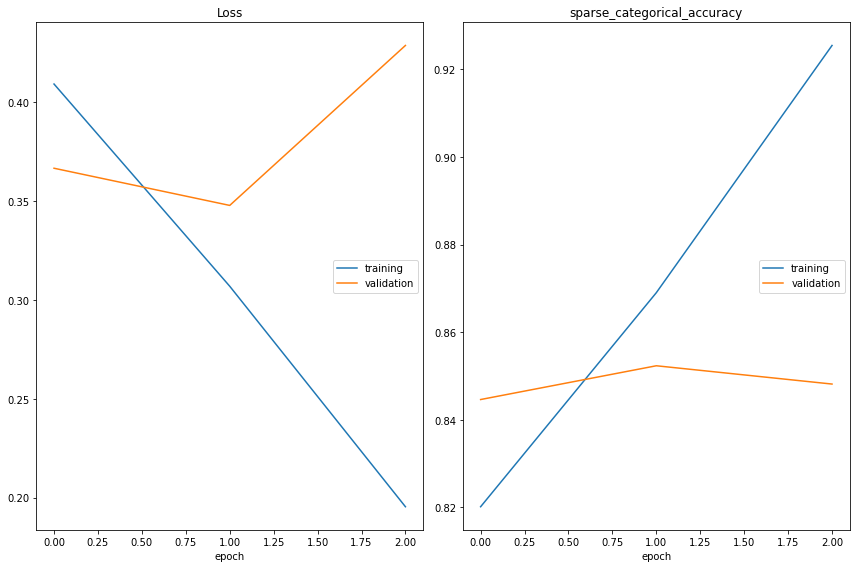

Loss
	training         	 (min:    0.195, max:    0.409, cur:    0.195)
	validation       	 (min:    0.348, max:    0.429, cur:    0.429)
sparse_categorical_accuracy
	training         	 (min:    0.820, max:    0.925, cur:    0.925)
	validation       	 (min:    0.845, max:    0.852, cur:    0.848)
909/909 [==============================] - 238s 262ms/step - loss: 0.1954 - sparse_categorical_accuracy: 0.9254 - val_loss: 0.4287 - val_sparse_categorical_accuracy: 0.8482


In [39]:
history = model.fit(train_set_for_final_model, validation_data=val_set_for_final_model, epochs=3,callbacks=[callbacks],verbose=1 )

In [40]:
test_loss, test_acc = model.evaluate(test_set_for_final_model,verbose=1)
print('\nTest accuracy:', test_acc)

195/195 [==============================] - 17s 88ms/step - loss: 0.4734 - sparse_categorical_accuracy: 0.8289

Test accuracy: 0.8288924694061279


In [41]:
preds = model.predict(test_set_for_final_model,verbose=1)

195/195 [==============================] - 20s 87ms/step


In [42]:
model.save('/content/gdrive/MyDrive/WAR misinformation/bert_labels')

In [43]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=ae5f7efc67c274d58e0c6170aca914ed40fdfdae53a913919fec4c1e8dfe8a69
  Stored in directory: /root/.cache/pip/wheels/ad/5c/ba/05fa33fa5855777b7d686e843ec07452f22a66a138e290e732
Successfully built seqeval


In [44]:
import seqeval
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [45]:
test_labels = []
for i in range(len(test_valid['test']['Labels'])):
  l = test_valid['test']['Labels'][i]
  if(l==1):
    test_labels.append("HATE")
  else:
    test_labels.append("NON-HATE")
  

In [46]:
preds_labels = []
for i in range(len(preds['logits'])):
  p = np.argmax(preds['logits'][i])
  if(p==1):
    preds_labels.append("HATE")
  else:
    preds_labels.append("NON-HATE")


In [47]:
def doublylist(lst):
    return [[w] for w in lst]

In [48]:
preds_labels = doublylist(preds_labels)
test_labels = doublylist(test_labels)

In [49]:
test_labels

[['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NO

In [50]:
preds_labels

[['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 ['NON-HATE'],
 

In [51]:
np.array(preds_labels).shape

(3115, 1)

In [52]:
np.array(test_labels).shape

(3115, 1)

In [53]:
print(classification_report(preds_labels,test_labels))

              precision    recall  f1-score   support

         ATE       0.45      0.65      0.53       464
        HATE       0.93      0.86      0.90      2651

   micro avg       0.83      0.83      0.83      3115
   macro avg       0.69      0.75      0.71      3115
weighted avg       0.86      0.83      0.84      3115



/usr/local/lib/python3.8/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: NON-HATE seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.8/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: HATE seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


In [54]:
print(f1_score(preds_labels, test_labels,average='micro'))

0.828892455858748


In [55]:
print(precision_score(preds_labels, test_labels))

0.828892455858748


In [56]:
print(recall_score(preds_labels, test_labels))

0.828892455858748
